In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

In [5]:
data = pd.read_csv('/content/sales_data.csv')

In [6]:
conn = sql.connect("sales_data.db")

In [9]:
data.to_sql("sales", conn, if_exists="replace", index=False)

200

In [11]:
query_all = "SELECT * FROM sales"
df_all = pd.read_sql_query(query_all, conn)
print("Full 'sales' Table:")
print(df_all)

Full 'sales' Table:
           Date  Customer_Number  Quantity_Ordered  Price  Total_Sales  \
0    03-04-2025              166                10  11670       116700   
1    28-11-2024              180                 3  31090        93270   
2    30-11-2024              188                 2  46500        93000   
3    13-02-2025              192                 4  71480       285920   
4    07-12-2024              106                 6  16810       100860   
..          ...              ...               ...    ...          ...   
195  26-03-2025              183                 7  77450       542150   
196  14-01-2025              133                 2  67700       135400   
197  07-01-2025              160                 5  37280       186400   
198  25-10-2024              169                 4  11730        46920   
199  12-03-2025              102                 5  58240       291200   

     Country Quarter_ID      Product_Type  
0    Germany         Q2  Sports Equipment  
1  

In [12]:
query = ''' Select sum(Total_Sales) as Total_sale from sales where Country = 'USA' '''
df1 = pd.read_sql_query(query, conn)
print("Full 'sales' Table:")
print(df1)

Full 'sales' Table:
   Total_sale
0     9560040


In [24]:
query1 = ''' Select sum(Quantity_Ordered) from sales group by(Quarter_ID)   '''
df2 = pd.read_sql_query(query1, conn)
print("Full 'sales' Table:")
print(df2)

Full 'sales' Table:
   sum(Quantity_Ordered)
0                    572
1                     43
2                    534


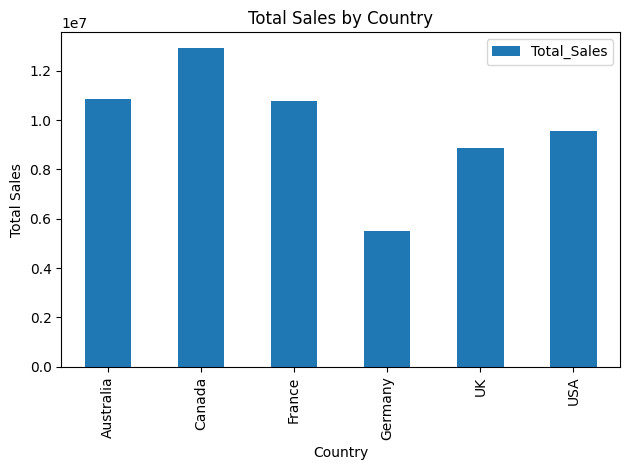

In [20]:
data1=data.groupby('Country')['Total_Sales'].sum().reset_index()
data1.plot(kind='bar', x='Country', y='Total_Sales')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.savefig("total_sales_by_country.png")
plt.tight_layout()
plt.show()